In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/smatthe2/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/smatthe2/.local/lib/python3.6/site-packages/IPython/extensions', '/home/smatthe2/.ipython', '/home/smatthe2/GillesPy2']


In [3]:
import math
from gillespy2.core import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.solvers.python.basic_ssa_solver import BasicSSASolver
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

/home/smatthe2/.local/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/smatthe2/GillesPy2/gillespy2/solvers/cython/cython_ssa_solver.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [4]:

class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
            rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1, r2])
            self.timespan(numpy.linspace(0,100, 1001))

In [5]:
model = SimpleHybridModel()

In [6]:
%time results = model.run(solver=BasicTauHybridSolver(), show_labels=True, debug=False)
%time results2 = model.run(solver=BasicSSASolver(), show_labels=True)
# import cProfile

# cProfile.run('model.run(solver=BasicTauHybridSolver(), show_labels=True, debug=False)', sort='tot')

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 528 ms
CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 44.8 ms


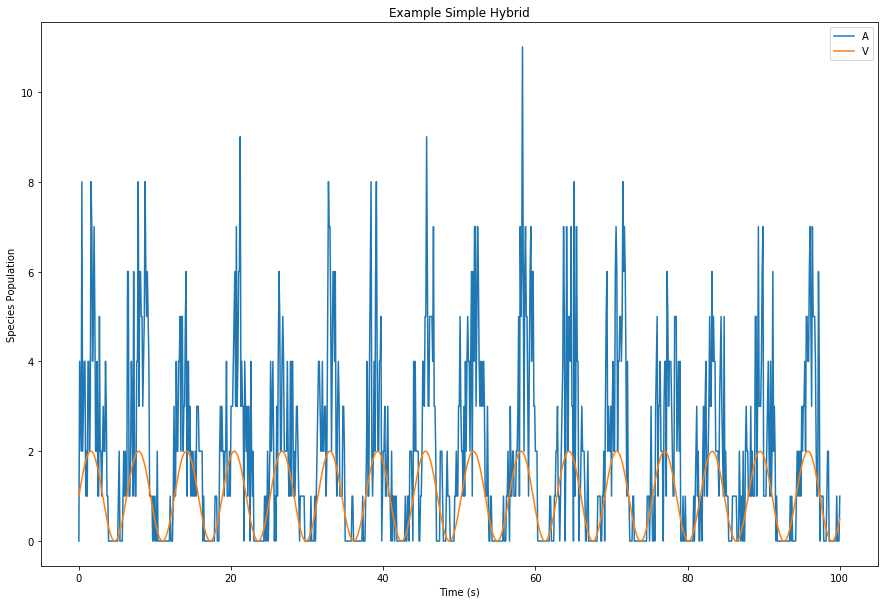

In [7]:
plt.figure(figsize=(15,10))
plt.title("Example Simple Hybrid")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")
plt.plot(results[0]['time'], results[0]['A'], label='A')
plt.plot(results[0]['time'], results[0]['V'], label='V')
plt.legend(loc='best')

In [8]:
max(results[0]['A'])

11